In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('train.csv', encoding='latin1')  # Adjust the path and encoding as needed
data.head()

,Label,Id,Date & Time,Query,Username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
data = pd.read_csv('train.csv', encoding='latin1')
print(data.columns.tolist())

['Label', 'Id', 'Date & Time', 'Query', 'Username', 'text']


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK data (if needed)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    words = word_tokenize(text)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
data['cleaned_text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
data['sentiment'] = data['Label'].map({0: 'negative', 2: 'neutral', 4: 'positive'})

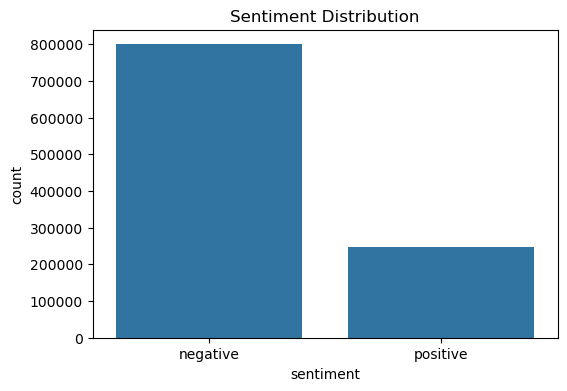

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_text'])
y = data['sentiment']

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.8310802756121403
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.94      0.89    160026
    positive       0.72      0.47      0.57     49689

    accuracy                           0.83    209715
   macro avg       0.78      0.71      0.73    209715
weighted avg       0.82      0.83      0.82    209715



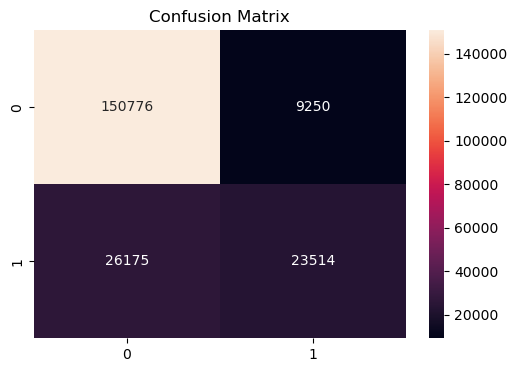

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8053882650263453


In [35]:
import joblib
import os

# Define the model filename
model_filename = 'sentiment_model.pkl'

# Check if the directory exists (in this case, we're using the current directory)
current_directory = os.getcwd()  # Get the current working directory
model_path = os.path.join(current_directory, model_filename)

# Save the model to the current directory
joblib.dump(model, model_path)

print(f"Model saved successfully at {model_path}")


Model saved successfully at C:\Users\ayush\intern_project\sentiment_model.pkl


In [41]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Example single text input
single_text = "yes!"

# Function to preprocess single text
def preprocess_single_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    words = [WordNetLemmatizer().lemmatize(word) for word in words]  # Lemmatize
    return ' '.join(words)

# Preprocess the single text
preprocessed_text = preprocess_single_text(single_text)

# Transform the preprocessed text using the fitted TF-IDF vectorizer
single_text_vector = tfidf.transform([preprocessed_text])

# Predict the sentiment
predicted_sentiment = model.predict(single_text_vector)

# Debugging print statements to check the output of the model
print("Raw Model Output (Predicted Sentiment):", predicted_sentiment)

# Directly print the predicted sentiment as it is already a string
predicted_label = predicted_sentiment[0]
print("Predicted Sentiment Label:", predicted_label)

Raw Model Output (Predicted Sentiment): ['positive']
Predicted Sentiment Label: positive
